In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

/tmp/ipykernel_648/383278000.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
def simulate_diffusion(v, a, beta, tau, dt=1e-3, scale=1.0, max_time=10.):
    """
    Simulates one realization of the diffusion process given
    a set of parameters and a step size `dt`.

    Parameters:
    -----------
    v     : float
        The drift rate (rate of information uptake)
    a     : float
        The boundary separation (decision threshold).
    beta  : float in [0, 1]
        Relative starting point (prior option preferences)
    tau   : float
        Non-decision time (additive constant)
    dt    : float, optional (default: 1e-3 = 0.001)
        The step size for the Euler algorithm.
    scale : float, optional (default: 1.0)
        The scale (sqrt(var)) of the Wiener process. Not considered
        a parameter and typically fixed to either 1.0 or 0.1.
    max_time: float, optional (default: .10)
        The maximum number of seconds before forced termination.

    Returns:
    --------
    (x, c) - a tuple of response time (y - float) and a 
        binary decision (c - int) 
    """

    # Inits (process starts at relative starting point)
    y = beta * a
    num_steps = tau
    const = scale*np.sqrt(dt)

    # Loop through process and check boundary conditions
    while (y <= a and y >= 0) and num_steps <= max_time:

        # Perform diffusion equation
        z = np.random.randn()
        y += v*dt + const*z

        # Increment step counter
        num_steps += dt

    if y >= a:
        c = 1
    else:
        c = 0
    return (round(num_steps, 3), c)


def simulate_diffusion_n(num_sims, v, a, beta, tau, dt=1e-3, scale=1.0, max_time=10.):

    data = np.zeros((num_sims, 2))
    for n in range(num_sims):
        data[n, :] = simulate_diffusion(v, a, beta, tau, dt, scale, max_time)
    return data

def visualize_diffusion_model(data, figsize=(8, 6)):
    f, ax = plt.subplots(1, 1, figsize=figsize)
    sns.histplot(data[:, 0][data[:, 1] == 1], color='purple', alpha=0.7, ax=ax, label='Positive Response')
    sns.histplot(data[:, 0][data[:, 1] == 0], color='pink', ax=ax, label='Negative Response')
    sns.despine(ax=ax)
    ax.set_xlabel('Response time (s)', fontsize=18)
    ax.set_ylabel('')
    ax.legend(fontsize=18)
    ax.set_yticks([])
    return f

def calculate_mrt_diff(data):
    N = data.shape[0]
    arr = np.array(data)

    pos_rts = arr[arr[:,1]==1,0]
    neg_rts = arr[arr[:,1]==0,0]

    pos_mrt = np.nanmean(pos_rts)
    neg_mrt = np.nanmean(neg_rts)
    mrt_diff = abs(neg_mrt - pos_mrt)
    
    return mrt_diff

In [22]:
params = {
    'v': 0,
    'a': 3.0,
    'beta': 0.5,
    'tau': 0.5
}

In [23]:
N = 2000
drift_arr = np.linspace(0.5, 1.5, num=25)
mrt_stats = []
for rate in drift_arr:
    params['v'] = rate
    print(f"Simulating diffusion with drift rate {params['v']}")
    data = simulate_diffusion_n(N, **params)
    stats = calculate_mrt_diff(data)
    mrt_stats.append(stats)

Simulating diffusion with drift rate 0.5
Simulating diffusion with drift rate 0.5416666666666666
Simulating diffusion with drift rate 0.5833333333333334
Simulating diffusion with drift rate 0.625
Simulating diffusion with drift rate 0.6666666666666666
Simulating diffusion with drift rate 0.7083333333333333
Simulating diffusion with drift rate 0.75
Simulating diffusion with drift rate 0.7916666666666666
Simulating diffusion with drift rate 0.8333333333333333
Simulating diffusion with drift rate 0.875
Simulating diffusion with drift rate 0.9166666666666666
Simulating diffusion with drift rate 0.9583333333333333
Simulating diffusion with drift rate 1.0
Simulating diffusion with drift rate 1.0416666666666665
Simulating diffusion with drift rate 1.0833333333333333
Simulating diffusion with drift rate 1.125
Simulating diffusion with drift rate 1.1666666666666665
Simulating diffusion with drift rate 1.2083333333333333
Simulating diffusion with drift rate 1.25
Simulating diffusion with drift r

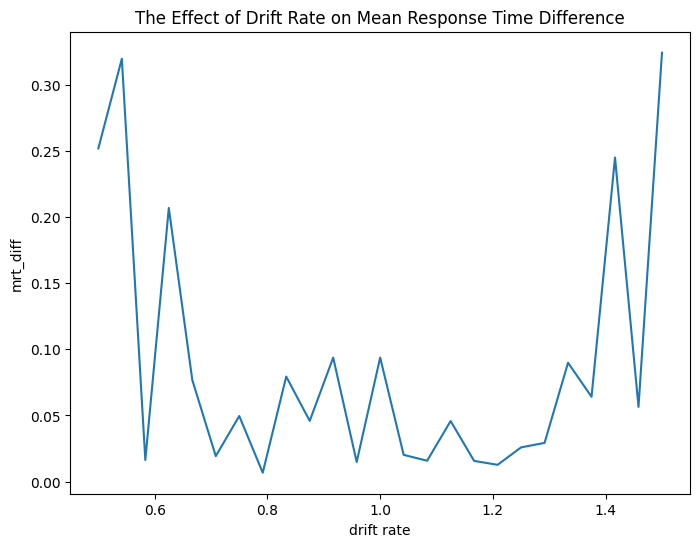

In [24]:
mrt_diff_df = pd.DataFrame(np.column_stack([drift_arr, mrt_stats]), columns =['drift rate','mrt_diff'])
mrt_diff_df['mrt_diff'] = mrt_diff_df['mrt_diff'].fillna(0)

f, ax = plt.subplots(1, 1, figsize=(8, 6))
sns.lineplot(data=mrt_diff_df, x="drift rate", y="mrt_diff", ax=ax)
ax.set_title('The Effect of Drift Rate on Mean Response Time Difference')
f.show()

__What do you observe regarding the mean difference? Describe and interpret your results.__ \
Based on my plot of mean response time difference and drift rate, as the drift rate was decreased from 1.0 the model's negative response time overtook the positive response time, leading to a spike in response difference. The same was true of as the drift rate increase to 1.5, ,but it was due to the positive response time overtaking the negative because the rate was higher.

In [6]:
params = {
    'v': 1.0,
    'a': 0,
    'beta': 0.5,
    'tau': 0.5
}

In [7]:
N = 2000
alpha_arr = np.linspace(0.5, 5.0, num=25)
mrt_stats = []
for alpha in alpha_arr:
    params['a'] = alpha
    print(f"Simulating diffusion with threshold {params['a']}")
    data = simulate_diffusion_n(N, **params)
    stats = calculate_mrt_diff(data)
    mrt_stats.append(stats)

Simulating diffusion with threshold 0.5
Simulating diffusion with threshold 0.6875
Simulating diffusion with threshold 0.875
Simulating diffusion with threshold 1.0625
Simulating diffusion with threshold 1.25
Simulating diffusion with threshold 1.4375
Simulating diffusion with threshold 1.625
Simulating diffusion with threshold 1.8125
Simulating diffusion with threshold 2.0
Simulating diffusion with threshold 2.1875
Simulating diffusion with threshold 2.375
Simulating diffusion with threshold 2.5625
Simulating diffusion with threshold 2.75
Simulating diffusion with threshold 2.9375
Simulating diffusion with threshold 3.125
Simulating diffusion with threshold 3.3125
Simulating diffusion with threshold 3.5
Simulating diffusion with threshold 3.6875
Simulating diffusion with threshold 3.875
Simulating diffusion with threshold 4.0625
Simulating diffusion with threshold 4.25
Simulating diffusion with threshold 4.4375
Simulating diffusion with threshold 4.625
Simulating diffusion with thresh

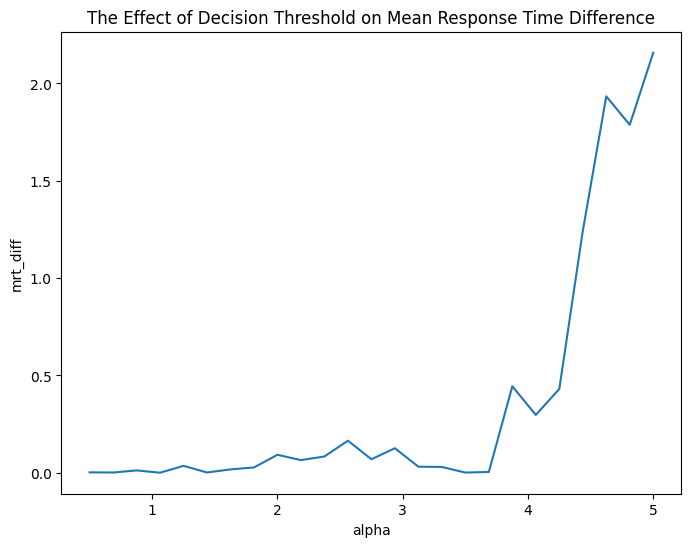

In [8]:
mrt_diff_df = pd.DataFrame(np.column_stack([alpha_arr, mrt_stats]), columns =['alpha','mrt_diff'])
mrt_diff_df['mrt_diff'] = mrt_diff_df['mrt_diff'].fillna(0)

f, ax = plt.subplots(1, 1, figsize=(8, 6))
sns.lineplot(data=mrt_diff_df, x="alpha", y="mrt_diff", ax=ax)
ax.set_title('The Effect of Decision Threshold on Mean Response Time Difference')
f.show()

__What do you observe regarding the mean difference? Describe and interpret your results.__ \
Based on my plot of mean response time difference and threshold, as the threshold was increased the model's positive and negative response times remained relatively equivalent until about alpha = 4. At this turning point, the decision threshold became so large that the positive drift rate was overcome by the very large threshold, allowing more negative outcomes to become possible.

In [9]:
params = {
    'v': 1.0,
    'a': 3.0,
    'beta': 0,
    'tau': 0.5
}

In [10]:
N = 2000
beta_arr = np.linspace(0.0, 1.0, num=25)
mrt_stats = []
for beta in beta_arr:
    params['beta'] = beta
    print(f"Simulating diffusion with prior preference {params['beta']}")
    data = simulate_diffusion_n(N, **params)
    stats = calculate_mrt_diff(data)
    mrt_stats.append(stats)

Simulating diffusion with prior preference 0.0
Simulating diffusion with prior preference 0.041666666666666664
Simulating diffusion with prior preference 0.08333333333333333
Simulating diffusion with prior preference 0.125
Simulating diffusion with prior preference 0.16666666666666666
Simulating diffusion with prior preference 0.20833333333333331
Simulating diffusion with prior preference 0.25
Simulating diffusion with prior preference 0.29166666666666663
Simulating diffusion with prior preference 0.3333333333333333
Simulating diffusion with prior preference 0.375
Simulating diffusion with prior preference 0.41666666666666663
Simulating diffusion with prior preference 0.4583333333333333
Simulating diffusion with prior preference 0.5
Simulating diffusion with prior preference 0.5416666666666666
Simulating diffusion with prior preference 0.5833333333333333
Simulating diffusion with prior preference 0.625
Simulating diffusion with prior preference 0.6666666666666666
Simulating diffusion w

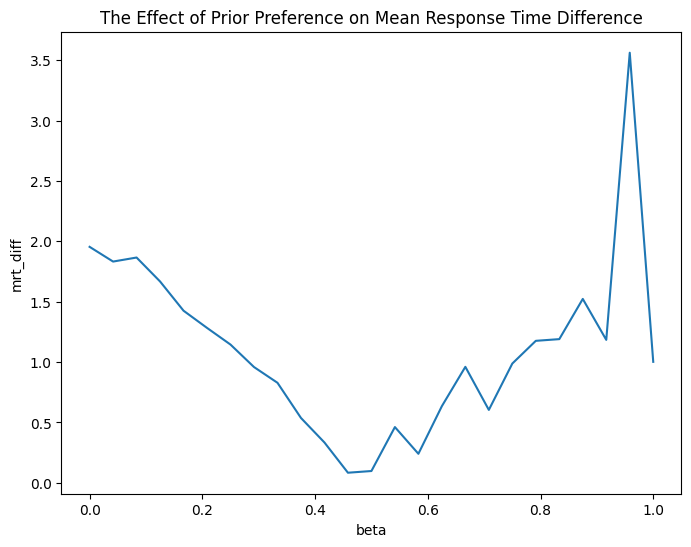

In [11]:
mrt_diff_df = pd.DataFrame(np.column_stack([beta_arr, mrt_stats]), columns =['beta','mrt_diff'])
mrt_diff_df['mrt_diff'] = mrt_diff_df['mrt_diff'].fillna(0)

f, ax = plt.subplots(1, 1, figsize=(8, 6))
sns.lineplot(data=mrt_diff_df, x="beta", y="mrt_diff", ax=ax)
ax.set_title('The Effect of Prior Preference on Mean Response Time Difference')
f.show()

__What do you observe regarding the mean difference? Describe and interpret your results.__ \
Based on my plot of mean response time difference and prior preference, the closer the prior is to the corresponding response the larger the response difference is. This is due to the fact that it is more likely to reach that response the closer it starts to it.

In [12]:
params = {
    'v': 1.0,
    'a': 3.0,
    'beta': 0.5,
    'tau': 0
}

In [13]:
N = 2000
tau_arr = np.linspace(0.0, 0.5, num=25)
mrt_stats = []
for tau in tau_arr:
    params['tau'] = tau
    print(f"Simulating diffusion with non-decision time {params['tau']}")
    data = simulate_diffusion_n(N, **params)
    stats = calculate_mrt_diff(data)
    mrt_stats.append(stats)

Simulating diffusion with non-decision time 0.0
Simulating diffusion with non-decision time 0.020833333333333332
Simulating diffusion with non-decision time 0.041666666666666664
Simulating diffusion with non-decision time 0.0625
Simulating diffusion with non-decision time 0.08333333333333333
Simulating diffusion with non-decision time 0.10416666666666666
Simulating diffusion with non-decision time 0.125
Simulating diffusion with non-decision time 0.14583333333333331
Simulating diffusion with non-decision time 0.16666666666666666
Simulating diffusion with non-decision time 0.1875
Simulating diffusion with non-decision time 0.20833333333333331
Simulating diffusion with non-decision time 0.22916666666666666
Simulating diffusion with non-decision time 0.25
Simulating diffusion with non-decision time 0.2708333333333333
Simulating diffusion with non-decision time 0.29166666666666663
Simulating diffusion with non-decision time 0.3125
Simulating diffusion with non-decision time 0.3333333333333

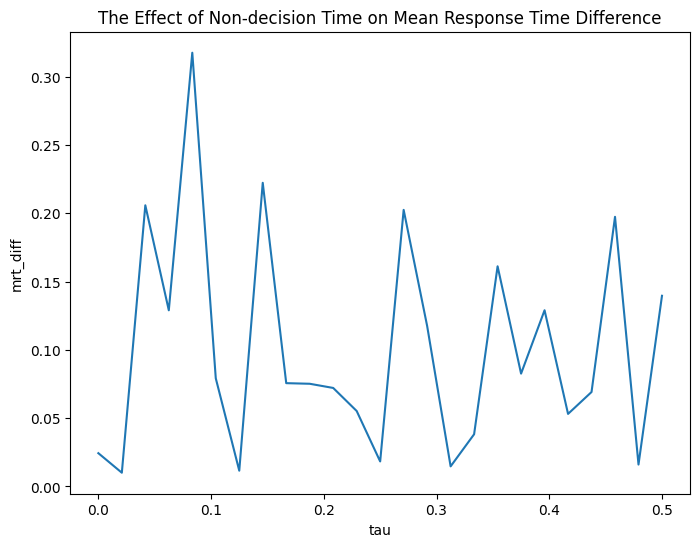

In [14]:
mrt_diff_df = pd.DataFrame(np.column_stack([tau_arr, mrt_stats]), columns =['tau','mrt_diff'])
mrt_diff_df['mrt_diff'] = mrt_diff_df['mrt_diff'].fillna(0)

f, ax = plt.subplots(1, 1, figsize=(8, 6))
sns.lineplot(data=mrt_diff_df, x="tau", y="mrt_diff", ax=ax)
ax.set_title('The Effect of Non-decision Time on Mean Response Time Difference')
f.show()

__What do you observe regarding the mean difference? Describe and interpret your results.__ \
Based on my plot of mean response time difference and non-decision time, it seems like there no coherent relationship between how long the decision latency is and how long each response takes. 